# imported required libraries

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay

# Load the Dataset

In [7]:
iris = load_iris()
X = iris.data
y = iris.target

# Normalize the Features

In [9]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the Dataset

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

# Train KNN Classifier with Different K values

In [13]:
k_values = [1, 3, 5, 7, 9]
for k in k_values:
    model = KNeighborsClassifier(n_neighbors=k)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    print(f"K={k}: Accuracy = {acc:.2f}")

K=1: Accuracy = 0.98
K=3: Accuracy = 1.00
K=5: Accuracy = 1.00
K=7: Accuracy = 1.00
K=9: Accuracy = 1.00


# Evaluate Using Confusion Matrix

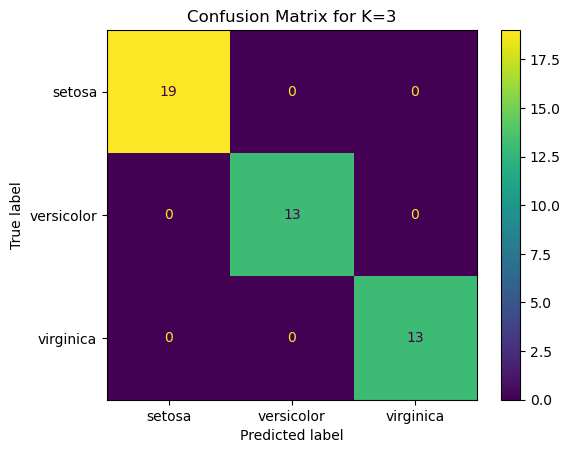

In [15]:
best_k = 3  # You can choose based on previous results
model = KNeighborsClassifier(n_neighbors=best_k)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=iris.target_names)
disp.plot()
plt.title(f"Confusion Matrix for K={best_k}")
plt.show()

# Visualize Decision Boundaries

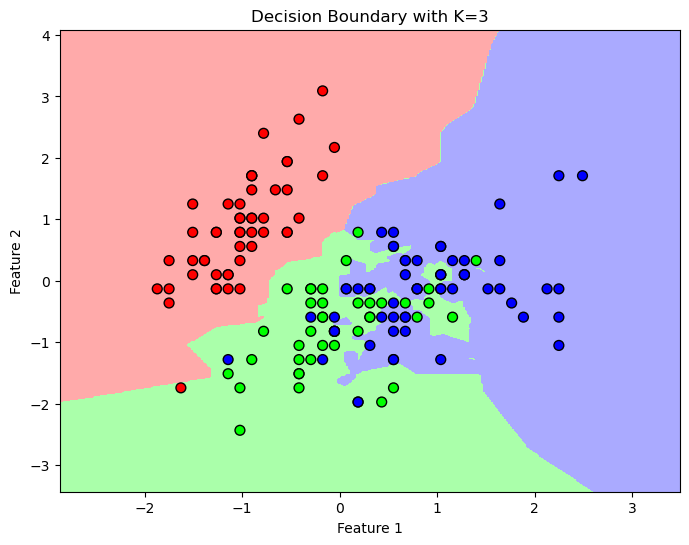

In [17]:
from matplotlib.colors import ListedColormap

def plot_decision_boundary(X, y, model, k):
    h = 0.02
    cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
    cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])

    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.figure(figsize=(8, 6))
    plt.contourf(xx, yy, Z, cmap=cmap_light)
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap_bold, edgecolor='k', s=50)
    plt.title(f"Decision Boundary with K={k}")
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.show()

# Use only first two features for 2D plot
X_2d = X_scaled[:, :2]
model_2d = KNeighborsClassifier(n_neighbors=best_k)
model_2d.fit(X_2d, y)
plot_decision_boundary(X_2d, y, model_2d, best_k)